# Project_4

## Witch Trials Dataset 

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [111]:
df = pd.read_csv("trials.csv")
df.isna().sum()

year              931
decade              0
century             0
tried               0
deaths           3826
                 ... 
gadm.adm1         159
gadm.adm0           0
lon              5803
lat              5803
record.source       0
Length: 12, dtype: int64

In [112]:
# analyzing the column names
#df.loc[df['gadm.adm0'] == 'France']
# COMMUNE, DEPARTEMENT, REGION, COUNTRY

In [113]:
df.rename(columns={'gadm.adm2': 'district',
                   'gadm.adm1': 'region',
                   'gadm.adm0': 'country',
                   'record.source': 'source'},
                    inplace=True, errors='raise')

In [114]:
# we drop the "City" column because half of the data is missing.
df.drop(['city'], axis = 1, inplace = True)
# we drop "District" column also because it doesn't give us much insight.
df.drop(['district'], axis = 1, inplace = True)

In [115]:
# filling year nan's from the decade column.
df.year.fillna(df.decade, inplace=True)

In [116]:
# average deaths
df_average_deaths=df['deaths'].mean()
df_average_deaths

2.295895417486646

In [117]:
# This fills the nan values in the "deaths" column by country averages. But we still have countries that we don't have any data. So we have to fill those in with the average of all countries.

# Calculate the average deaths for each country
avg_deaths = df.groupby("country")["deaths"].transform("mean")

# Create a new column with the average deaths
df["avg_deaths"] = avg_deaths

# Fill the missing values in the deaths column with the values in the avg_deaths column
df["deaths"].fillna(df["avg_deaths"], inplace=True)

# Drop the avg_deaths column
df.drop(["avg_deaths"], axis=1, inplace=True)

df.isna().sum()

year          0
decade        0
century       0
tried         0
deaths      444
region      159
country       0
lon        5803
lat        5803
source        0
dtype: int64

In [118]:
# We fill the rest of the "deaths" column nan's with the average.
df["deaths"].fillna(df_average_deaths, inplace=True)
df.isna().sum()

year          0
decade        0
century       0
tried         0
deaths        0
region      159
country       0
lon        5803
lat        5803
source        0
dtype: int64

In [119]:
#Drops the rows where region is na.
df = df[df['region'].notna()]
df.isna().sum()
before_dropping_latitudes_version = df

In [120]:
#df.drop(['lon'], axis = 1, inplace = True)
#df.drop(['lat'], axis = 1, inplace = True)

In [121]:
# Fixed datatypes of year and deaths columns from float to int.
df['year'] = df['year'].astype('int64')
df['deaths'] = df['deaths'].astype('int64')
df.dtypes

year         int64
decade       int64
century      int64
tried        int64
deaths       int64
region      object
country     object
lon        float64
lat        float64
source      object
dtype: object

In [122]:
# We check for duplicates and remove them.
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  4652


In [123]:
## Check for low variance data.
low_variance = []

for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

[]


In [124]:
#Finding outliers.
def find_outliers_by_decile(data, columns):
    outliers = pd.DataFrame(columns=data.columns)
    
    for col in columns:
        lower_decile = data[col].quantile(0.05)
        upper_decile = data[col].quantile(0.95)
        results = data[(data[col] < lower_decile) | (data[col] > upper_decile)].copy()
        results['Outlier'] = col
        outliers = outliers.append(results)
        
    return outliers

## Find the outlier for only 2 columns 'Retweets#','Favorites#'

outliers = find_outliers_by_decile(df, columns=['deaths','tried'])

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\778073300.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\778073300.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [125]:
#Dropping outliers.
#df.drop(outliers.index, inplace=True)
df
# We reset the index.
df=df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

In [126]:
#Export dataframe as csv.
df.to_csv('project_4_clean.csv')

In [127]:
# average tried and deaths per country.
df.groupby("country")["tried","deaths"].mean()

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\553916516.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



tried    deaths
country                            
Austria          6.583333  2.250000
Belgium          1.466368  0.502242
Czech Republic   2.000000  2.000000
Denmark          1.000000  2.000000
France           5.822554  2.429519
...                   ...       ...
Poland           1.333333  0.333333
Spain           67.206897  0.034483
Sweden           1.000000  2.000000
Switzerland     10.781649  6.774681
United Kingdom   2.471326  0.566308

[15 rows x 2 columns]

In [128]:
# Count of data per country
df.groupby("country")["source"].count()

country
Austria            12
Belgium           446
Czech Republic      1
Denmark            28
France            603
                 ... 
Poland              9
Spain              29
Sweden            242
Switzerland       861
United Kingdom    558
Name: source, Length: 15, dtype: int64

In [129]:
# trial average by decades.
df.groupby('decade').agg({'tried': 'mean'}).reset_index()

decade     tried
0     1300  1.285714
1     1310  1.181818
2     1320  4.125000
3     1330  2.800000
4     1340  1.000000
..     ...       ...
48    1780  1.000000
49    1790  1.000000
50    1820  1.000000
51    1830  1.000000
52    1850  1.000000

[53 rows x 2 columns]

In [130]:
# deaths average by decades.
df.groupby('decade').agg({'deaths': 'mean'}).reset_index()

decade    deaths
0     1300  1.142857
1     1310  1.363636
2     1320  1.312500
3     1330  2.066667
4     1340  1.714286
..     ...       ...
48    1780  0.333333
49    1790  2.000000
50    1820  0.000000
51    1830  0.000000
52    1850  0.000000

[53 rows x 2 columns]

In [131]:
df.groupby("decade")["tried","deaths"].mean()

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\664656787.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



tried    deaths
decade                    
1300    1.285714  1.142857
1310    1.181818  1.363636
1320    4.125000  1.312500
1330    2.800000  2.066667
1340    1.000000  1.714286
...          ...       ...
1780    1.000000  0.333333
1790    1.000000  2.000000
1820    1.000000  0.000000
1830    1.000000  0.000000
1850    1.000000  0.000000

[53 rows x 2 columns]

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\2164872825.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

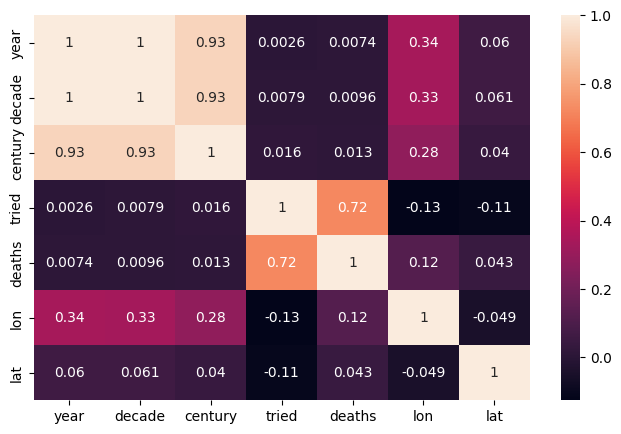

In [132]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [133]:
# Parallel categories plot

'''
This code uses the Plotly library to create a parallel categories plot from a pandas DataFrame "df". The parallel categories plot is a type of parallel coordinates plot that is used to visualize the relationships between categorical variables.

The code specifies that the color of each line in the plot should be determined by the values in the "tried" column, and that the continuous color scale should use the "OrRd" sequential color scheme from Plotly's colors module.
'''

fig = px.parallel_categories(df, color="deaths", color_continuous_scale=px.colors.sequential.OrRd)
fig.show()

In [144]:
#Scatter mapbox for sources
fig = px.scatter_mapbox(before_dropping_latitudes_version,
# Here, plotly gets, (x,y) coordinates
lat="lat",
lon="lon",
text='region',

                #Here, plotly detects color of series
                size="tried",
                color = "source",
                labels="region",

                zoom=3,
                center={"lat":48.790769, "lon":11.495927},
                height=600,
                width=800)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Witch Trials")
fig.show()

In [135]:
import pandas as pd
import folium

# Map for deaths

# dropping
df = df[df['lon'].notna()]
df = df[df['lat'].notna()]
df = df[df["deaths"] > 0]

# create the map object
m = folium.Map(location=[60, 25], zoom_start=5)

# loop through each row in the dataframe
for index, row in df.iterrows():
    folium.CircleMarker(location=[row["lat"], row["lon"]], 
                        radius=row["deaths"]*0.3, 
                        color="red", 
                        fill=True,
                        popup=f"Decade: {row['decade']}, Deaths: {row['deaths']}").add_to(m)

m

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\3418141392.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\berka\AppData\Local\Temp\ipykernel_8492\3418141392.py:20: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



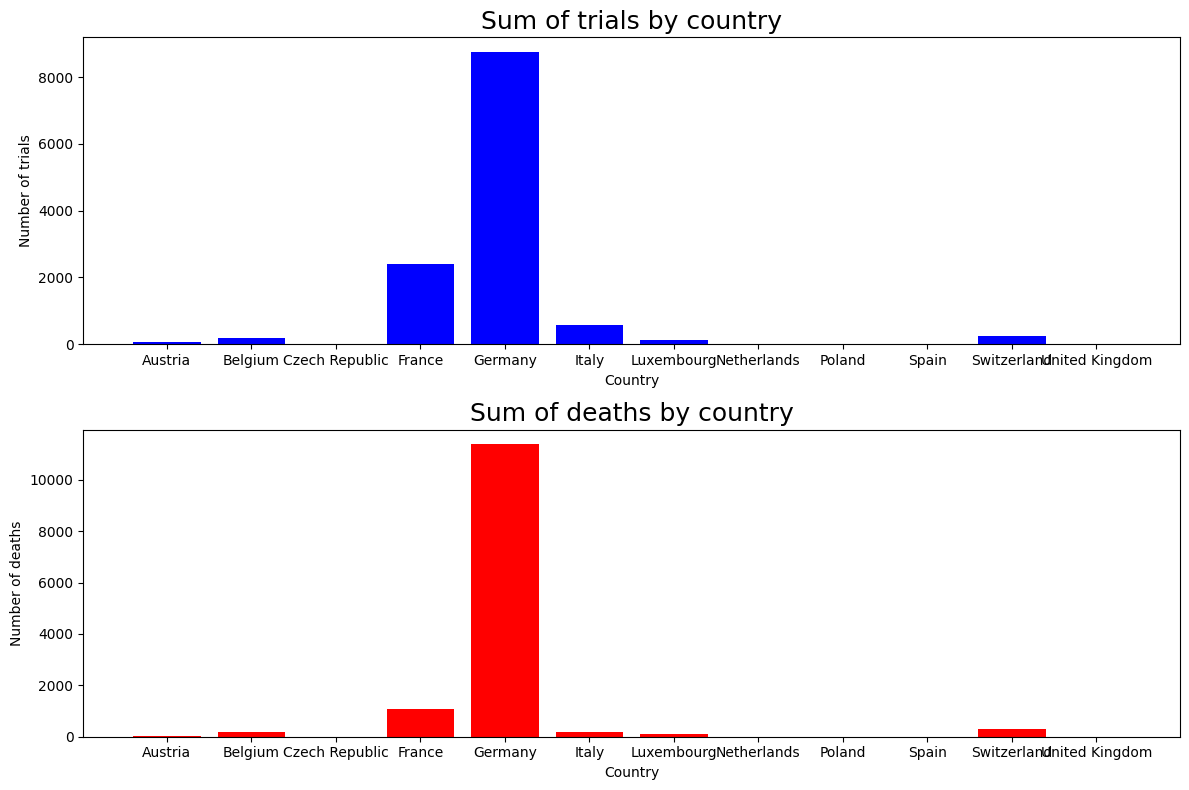

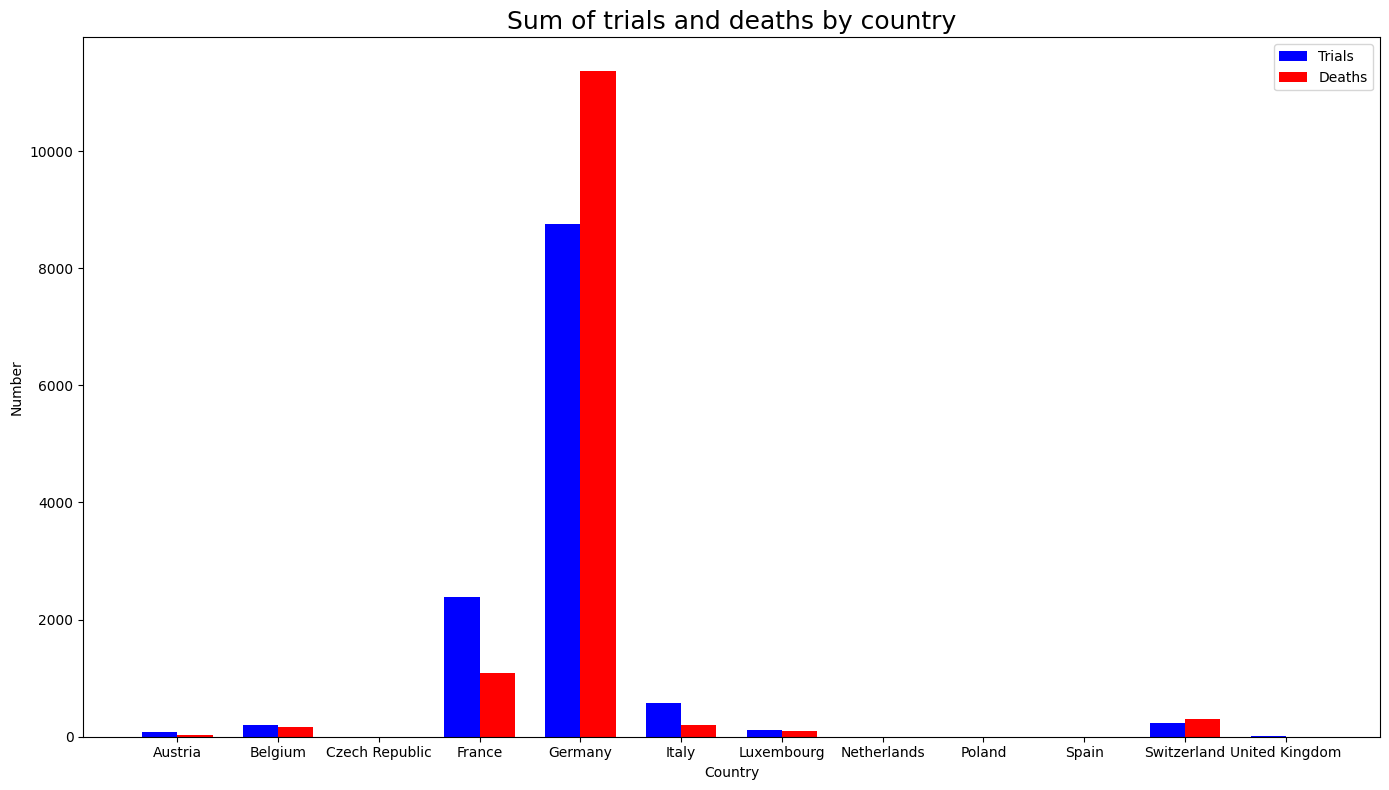

In [136]:
# Sum of trials by country, Sum of deaths by country
grouped_df=df.groupby("country")["tried","deaths"].sum()
# create figure and axes
fig3, axes3 = plt.subplots(2,1,figsize = (12,8))

# plot the bar chart
axes3[0].bar(grouped_df.index, grouped_df.tried, color=('blue'))
axes3[0].set_title("Sum of trials by country", fontsize=18)
axes3[0].set_xlabel("Country")
axes3[0].set_ylabel("Number of trials")

axes3[1].bar(grouped_df.index, grouped_df.deaths, color=('red'))
axes3[1].set_title("Sum of deaths by country", fontsize=18)
axes3[1].set_xlabel("Country")
axes3[1].set_ylabel("Number of deaths")

plt.tight_layout()

#
grouped_df=df.groupby("country")["tried","deaths"].sum()

fig, ax = plt.subplots(figsize = (14,8))

# create an x coordinate for each bar
x = np.arange(len(grouped_df.index))

# width of each bar
width = 0.35

# plot the trials bar
trials_bar = ax.bar(x - width/2, grouped_df.tried, width, color='blue', label='Trials')

# plot the deaths bar
deaths_bar = ax.bar(x + width/2, grouped_df.deaths, width, color='red', label='Deaths')

# set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_df.index)

# set the title and labels
ax.set_title("Sum of trials and deaths by country", fontsize=18)
ax.set_xlabel("Country")
ax.set_ylabel("Count")

# add the legend
ax.legend()

plt.tight_layout()

Text(0.5, 1.0, 'Source count by Country')

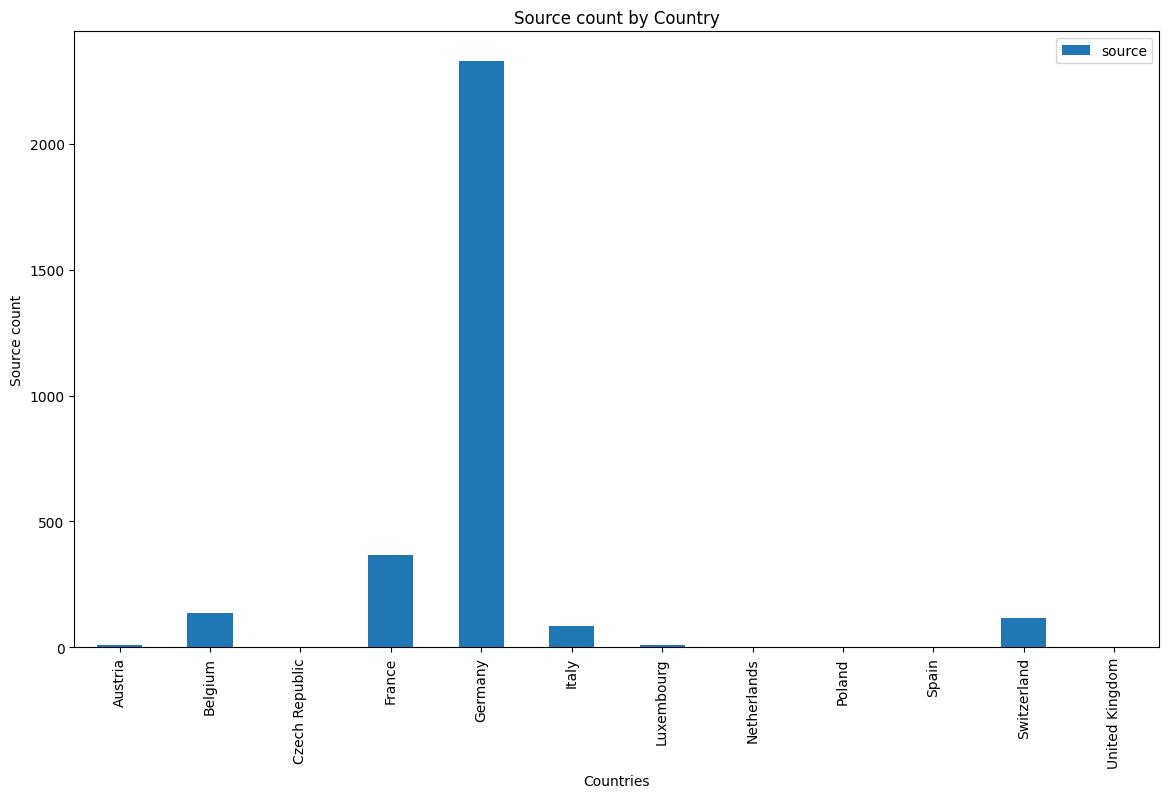

In [137]:
# Count of data per country
source_df=df.groupby("country")["source"].count()

dataframe1=pd.DataFrame(source_df)
#plt.bar(dataframe1["country"], dataframe1["source"])

dataframe1.plot(kind='bar', figsize=(14, 8))
plt.xlabel("Countries")
plt.ylabel("Source count")
plt.title("Source count by Country")

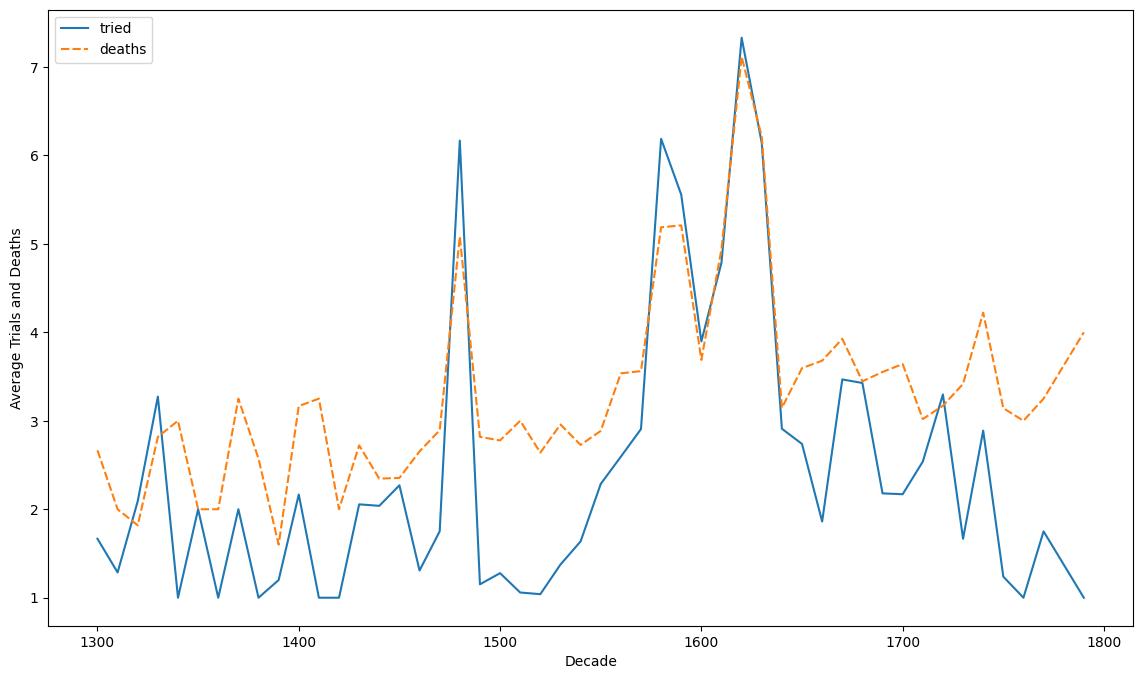

In [138]:
# trial average by decades.
average_trials_decade=df.groupby('decade').agg({'tried': 'mean'})
# deaths average by decades.
average_deaths_decade=df.groupby('decade').agg({'deaths': 'mean'})

# Concatenate the two dataframes
average_trials_deaths_decade = pd.concat([average_trials_decade, average_deaths_decade], axis=1)

# Plot the combined dataframe
sns.lineplot(data=average_trials_deaths_decade, figure=plt.figure(figsize=(14, 8)) )

plt.xlabel('Decade')
plt.ylabel('Average Trials and Deaths')
plt.legend(loc='upper left')
plt.show()

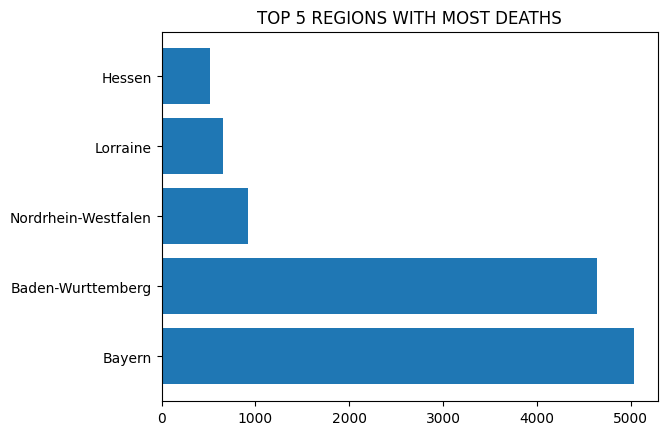

In [145]:
grouped_region = df.groupby("region").sum()
grouped_region = grouped_region["deaths"].sort_values(ascending = False).head(5)
grouped_region = pd.DataFrame(grouped_region)

grouped_region
plt.barh(y=grouped_region.index, width=grouped_region["deaths"]);
plt.title('TOP 5 REGIONS WITH MOST DEATHS');

In [146]:
import folium
import pandas as pd

# Define a dictionary of latitude and longitude for each region
region_locations = {'Bayern': [48.790769, 11.495927],
                    'Baden-Wurttemberg': [48.794649, 9.200282],
                    'Nordrhein-Westfalen': [51.465977, 7.598256],
                    'Lorraine': [48.871698, 6.275556],
                    'Hessen': [50.116667, 8.683333]}

# Create a base map centered on Germany
m = folium.Map(location=[51.163375, 10.447683], zoom_start=6)

# Create a dataframe with the region names and corresponding deaths
df = pd.DataFrame({'region': ['Bayern', 'Baden-Wurttemberg', 'Nordrhein-Westfalen', 'Lorraine', 'Hessen'],
                   'deaths': [5036, 4641, 926, 655, 515]})

# Loop through the dataframe and add markers for each region
for index, row in df.iterrows():
    region = row['region']
    deaths = row['deaths']
    lat, long = region_locations[region]
    folium.Marker(location=[lat, long], popup=f"{region}: {deaths} deaths").add_to(m)

# Show the map
m